# Plotting in Python with pandas & seaborn

Shahryar Noei 

Based on notebook originally designed by Marco Chierici

April 8, 2025

In [182]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mpl.style.use('ggplot')
%matplotlib inline

# Dataset for this lab

Canada immigration dataset (from UN International Migration Flows data)

- [info](https://www.un.org/development/desa/pd/data/international-migration-flows)
- [XLS table](https://docs.google.com/spreadsheets/d/1GzaKjWDXhqDMdgDr90WUlOnC69fqjoAj/edit?usp=share_link&ouid=106989670198624528744&rtpof=true&sd=true)

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

We'll focus on the Canadian immigration data.

# Short crash course on pandas

[pandas](http://pandas.pydata.org/) is one of the key data analysis toolkits available for Python. From the website:

>pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.


*pandas* facilitates operations ranging from data I/O (reading and writing to different file formats as CSV, Excel) to data wrangling and even visualization.

## The basics

Pandas facilitates file I/O from and to different file formats, such as comma- or tab-separated files (CSV, TSV), and MS Excel files (XLS, XLSX).

To read Excel files, pandas requires the additional module `openpyxl`:

```pip install openpyxl```

In [183]:
import pandas as pd
import numpy as np

We can now import the primary Canadian Immigration dataset using pandas' `read_excel` method.

In [184]:
data_file = "xlsx/Canada.xlsx"

df = pd.read_excel(
    data_file,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),#because the first rows are not actual data but "garbage"
    skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [185]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [186]:
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

This method can be used to get a short summary of the dataframe.

In [187]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


List of column names:

In [188]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

To get the row names (*indices*):

In [189]:
df.index

RangeIndex(start=0, stop=195, step=1)

Note that `columns` and `index` are not Python lists, but it is easy to convert them to lists!

In [190]:
df.columns.tolist()

['Type',
 'Coverage',
 'OdName',
 'AREA',
 'AreaName',
 'REG',
 'RegName',
 'DEV',
 'DevName',
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [191]:
len(df.index.tolist())

195

To view the dimensions of the dataframe, we use the `shape` instance variable.

In [192]:
df.shape

(195, 43)

**Note**: The main types stored in *pandas* objects are `float`, `int`, `bool`, `datetime64[ns]`, `datetime64[ns, tz]`, `timedelta[ns]`, `category`, and `object` (string). In addition, these dtypes have item sizes, e.g. `int64` and `int32`.


Let's clean the data set to remove a few unnecessary columns, such as AREA, REG, DEV, Type, and Coverage.

We use the `drop()` method as follows (note that we perform the operation *in place*):

In [193]:
# axis=0 represents rows (default) and axis=1 represents columns
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
# inplace is used to modify the data frame in place as pandas treat data frames as immutable objects unless specified differently
df.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Let's rename the columns so that they make sense. We can use `rename()` by passing in a dictionary of old and new names:

In [194]:
rename_dict = {'OdName':'Country', # old: new
               'AreaName':'Continent',
               'RegName':'Region'}

df.rename(columns=rename_dict, inplace=True)
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:


In [195]:
df['Total'] = df.sum(axis=1, numeric_only=True)

In [196]:
# sum only certain columns
col_list = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]
df[col_list].sum(axis=1)

0       3693
1          9
2       1271
3          3
4          2
       ...  
190    30638
191        0
192       72
193      221
194      790
Length: 195, dtype: int64

Quick check to see how many null elements are in the dataset, by column:

In [197]:
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

The `describe()` method provides a quick summary of each column in the dataframe (i.e., same as R's `summary()`)

In [198]:
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


## Indexing and selection

### Column selection

There are two possible ways:

1. the **easy** one - use `df.column_name` (only works if the column name does NOT have spaces or special characters). Returns a pandas Series

2. the **flexible** one - use
  - `df['column_name']`, which returns a pandas Series
  - `df[['column1', 'column2']]`, which returns a pandas DataFrame
  
  
Example: select the `Country` column.

In [199]:
df.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

Example: select the `Country` column and the years 1980-1983.

In [200]:
df_sel = df[['Country', 1980, 1981, 1982, 1983]]
df_sel.head()

,Country,1980,1981,1982,1983
0,Afghanistan,16,39,39,47
1,Albania,1,0,0,0
2,Algeria,80,67,71,69
3,American Samoa,0,1,0,0
4,Andorra,0,0,0,0


### Row selection

There are two alternative ways to select rows:

1. by label, `df.loc[label]`
2. by position, `df.iloc[index]`

Just for visualization purposes, let's shorten the label for the country "United Kingdom of Great Britain and Northern Ireland":

In [201]:
df.loc[df.Country == "United Kingdom of Great Britain and Northern Ireland", "Country"] = "UK"

Now, notice that the default index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corresponding index value.

This can be fixed very easily by setting the 'Country' column as the index using `set_index()` method.

In [202]:
df.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df.reset_index()

df.head(7)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,24,32,15,32,38,27,37,51,25,981


In [203]:
# optional: to remove the name of the index
# df.index.name = None

**Your turn:** view the number of immigrants from Japan (row 87) for the following scenarios:

1. The full row data (all columns)
2. For year 2013
3. For years 1980-1985

Try multiple selection methods.

In [204]:
#it is better to convert column names into strings to avoid problems
df.columns = list( map(str, df.columns) )

# 1
df.loc['Japan'].head(10)

# 2
df.loc['Japan', '2013']

# 3
df.loc['Japan', ['1980', '1981', '1982', '1983', '1984', '1985']]


1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

For consistency, let's ensure that all column labels are of type `str`:

In [205]:
all( isinstance(column, str) for column in df.columns )

True

Notice how the above line of code returned False when we tested if all the column labels are of type `str`.

It is unusual to have column names that aren't strings: this may create some confusion.

To avoid ambiguities, we convert all column names into strings:

In [206]:
df.columns = list( map(str, df.columns) )
#[print (type(x)) for x in df.columns.values]

Since we converted the years to string, let's create a variable storing the full range of years (will be useful for plotting later on):

In [207]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Condition-based filtering

To filter the dataframe based on a condition, we simply pass the condition as a boolean vector.

In [208]:
condition = df['Continent'] == 'Asia'
print(condition)

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [209]:
df_flt = df[condition]
df_flt.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568


You can filter on multiple criteria at once: however, note that

1. pandas requires you to use the &, | logical operators instead of `and`, `or`
2. you need to enclose each condition in parentheses

**Your turn:** test this out by selecting the `df` rows for the "Asia" continent and the "Southern Asia" region. How many rows do you obtain?

Then, check which countries belonging to the "Eastern Africa" region had more than 100 immigrants in the year 1984. How many rows do you get?

In [210]:
condition_asia = df['Continent'] == 'Asia'
condition_southern_asia = df['Region'] == 'Southern Asia'

df_flt = df[condition_asia & condition_southern_asia]
df_flt.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923


# Plotting with pandas

We can plot pandas dataframes directly! This implicitly uses `matplotlib.pyplot`.

Plotting in pandas is as simple as using a `.plot()` method on a series or dataframe.

## Line chart

### Case study: the 2010 Haiti earthquake

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about 3M people were affected by this natural disaster.

As part of Canada's humanitarian effort, the Canadian government stepped up its effort in accepting refugees from Haiti.

Task: plot a line graph of immigration from Haiti.

In [211]:
df[years].head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [212]:
haiti = df.loc['Haiti', years] # select years 1980-2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<Axes: >

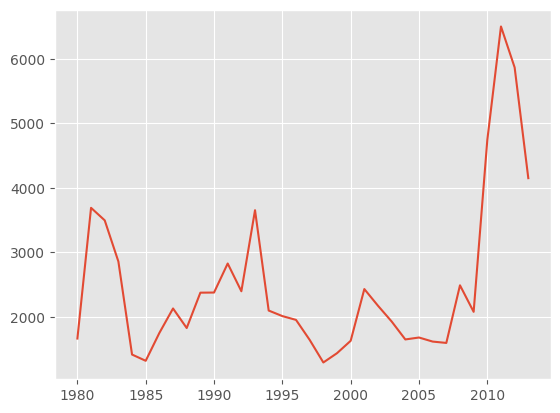

In [213]:
haiti.plot()

<Axes: >

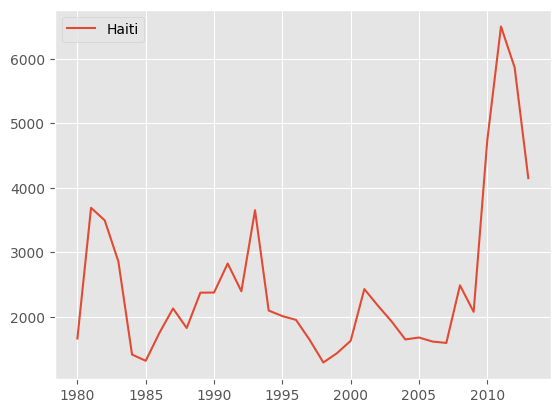

In [214]:
haiti.to_frame().plot()

We clearly notice how the number of immigrants from Haiti to Canada spiked up from 2010.

To further customize the plot with labels, title, legends, etc. we do that the matplotlib way:

Text(0, 0.5, 'Number of immigrants')

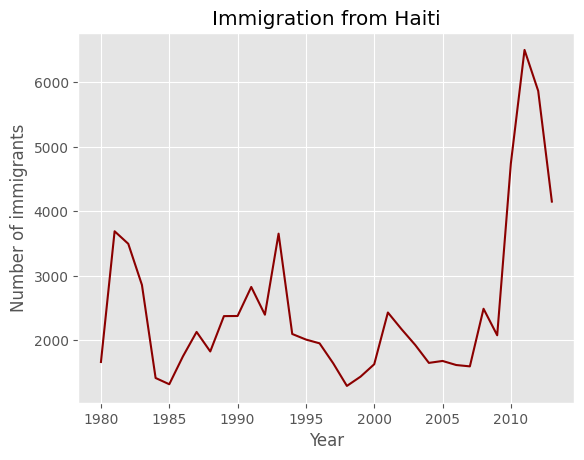

In [215]:
haiti.plot(kind="line", color="darkred") # kind="line" by default

plt.title("Immigration from Haiti")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")

We can annotate the spike using `plt.text` or `plt.annotate`: beforehand, we remember that the years are stored as strings, so we convert them back to integers. 

We also add `plt.show()` at the end to avoid unnecessary echoing from matplotlib:

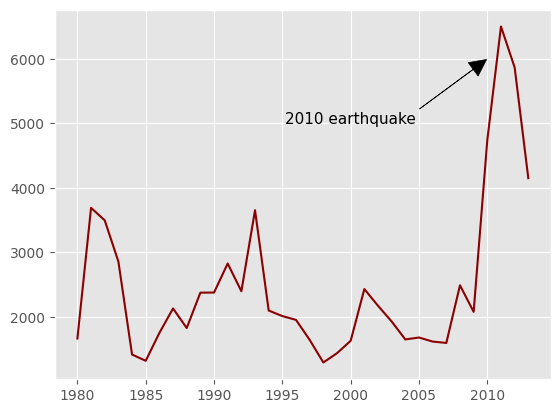

In [216]:
haiti.index = haiti.index.map(int)

haiti.plot(kind='line', color="darkred")
plt.annotate('2010 earthquake', xy=(2010, 6000), xytext=(2000, 5000),
             arrowprops=dict(color='black', shrink=0.01, width=0.1), 
             fontsize=11, color='black', horizontalalignment='center')
plt.show()

Now we can add more countries to the line plot to make meaningful comparisons: for example, let's compare the number of immigrants from India and China from 1980 to 2013.

In [217]:
df_ci = df.loc[['China','India'], years]
df_ci.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


<Axes: xlabel='Country'>

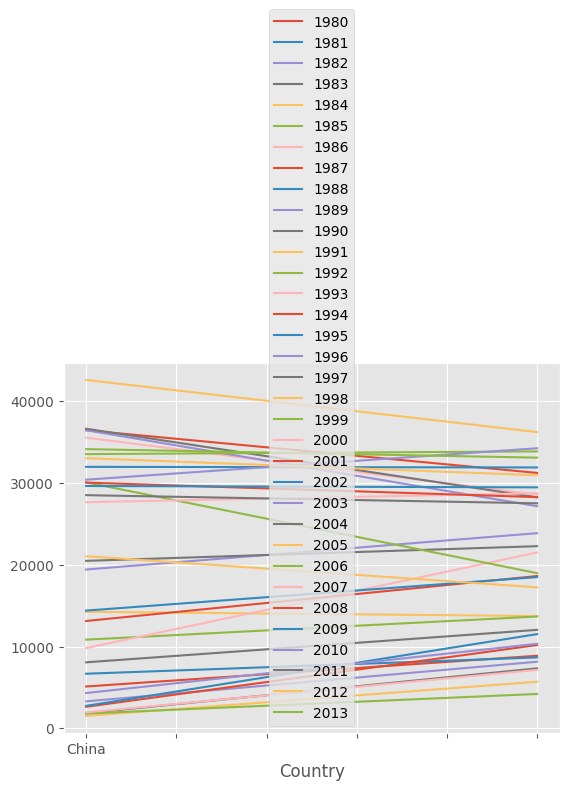

In [218]:
df_ci.plot(kind="line")

What happened?

pandas plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_ci` is a dataframe with `country` as the index and `years` as the columns, we must first transpose the dataframe using the `transpose()` method.

In [219]:
df_ci = df_ci.transpose()
df_ci.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


pandas will auomatically plot the two countries on the same graph and add a legend.

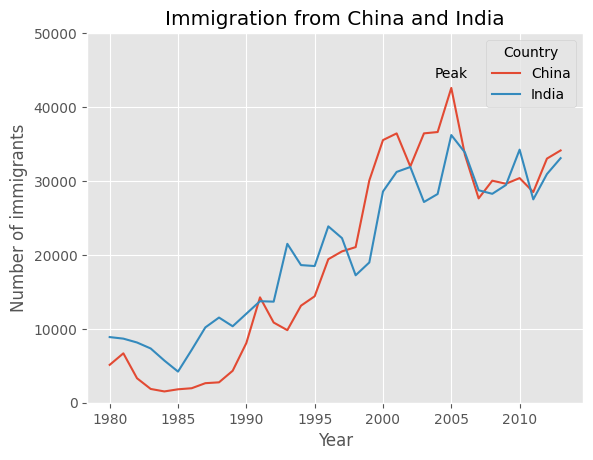

In [220]:
df_ci.index = df_ci.index.map(int)

df_ci.plot()

plt.title("Immigration from China and India")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")
plt.text(2005, 44000, "Peak", horizontalalignment="center")
plt.ylim(0, 50000)
plt.show()

From this plot, it seems like China and India have similary immigration patterns to Canada through the years.

---

**Your turn:** compare the trend of the 5 countries that contributed the most to immigration in Canada, in terms of total number of immigrants. Add proper labels and a legend. 

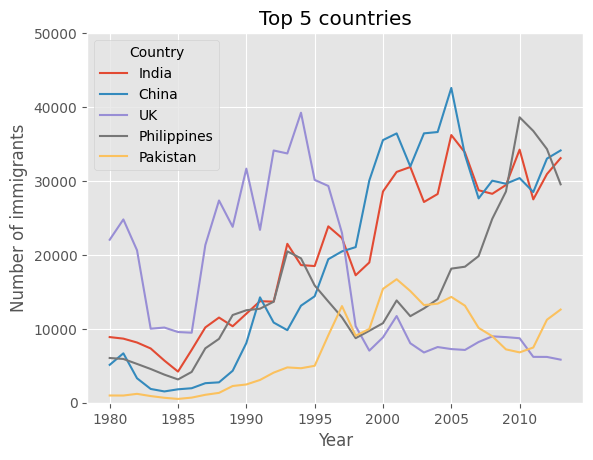

In [ ]:
df_top = df.nlargest(5, 'Total')
df_top = df_top.transpose() # otherwise we obtain a line for each year and not country

# need to drop non wanted rows
df_top.drop(['Region', 'DevName', 'Continent', 'Total'], inplace=True)
#df_top.head()

df_top.index = df_top.index.map(int)

df_top.plot()
plt.title("Top 5 countries")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")
plt.ylim((0,50000))
plt.show()

## A few common plots

### Area chart

We can represent the information of the above plot as an area chart (also called stacked line plot), simply using `kind='area'` within pandas `plot()`.

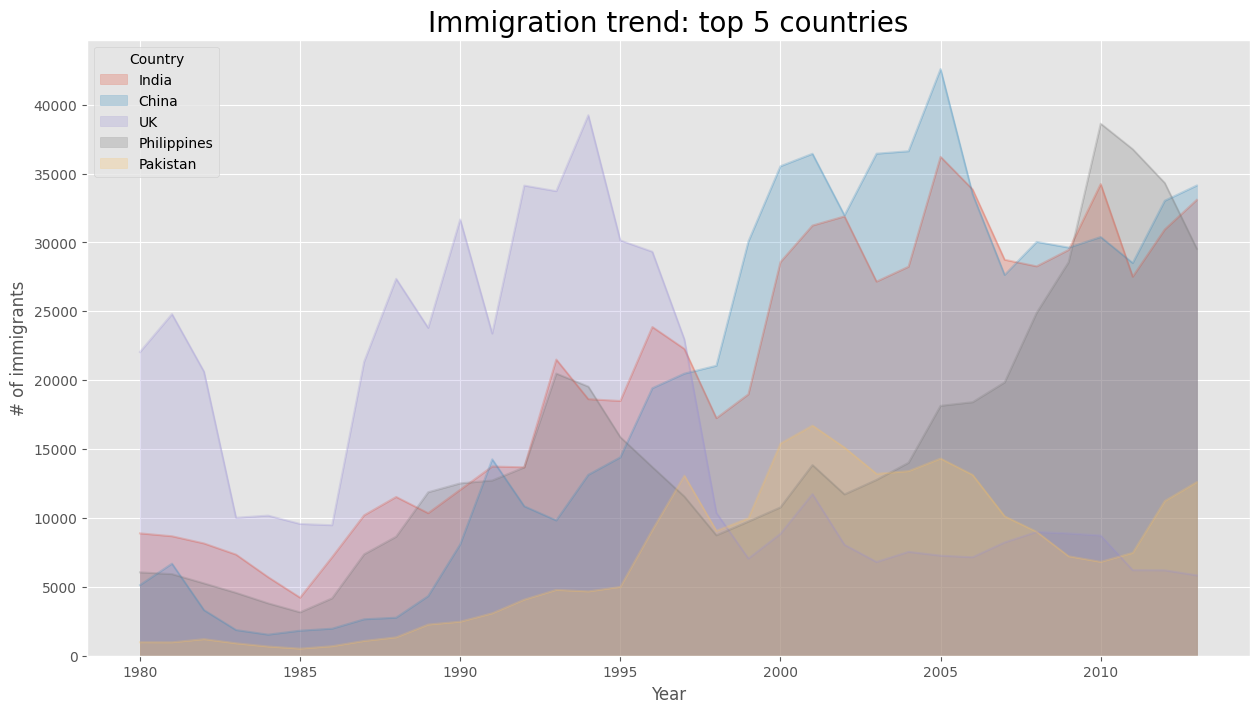

In [222]:
df_top.index.map(int) # convert years back to integers
df_top.plot(kind="area", stacked=False, # by default area charts are stacked
            alpha=0.25, # by default alpha=0.5
            figsize=(15, 8)) # increasing the figsize is another workaround for improving the legend location

plt.title("Immigration trend: top 5 countries", size=20)
plt.xlabel("Year")
plt.ylabel("# of immigrants")
plt.show()

What about matplotlib's OO interface? It is still possible to use it even when plotting with pandas.

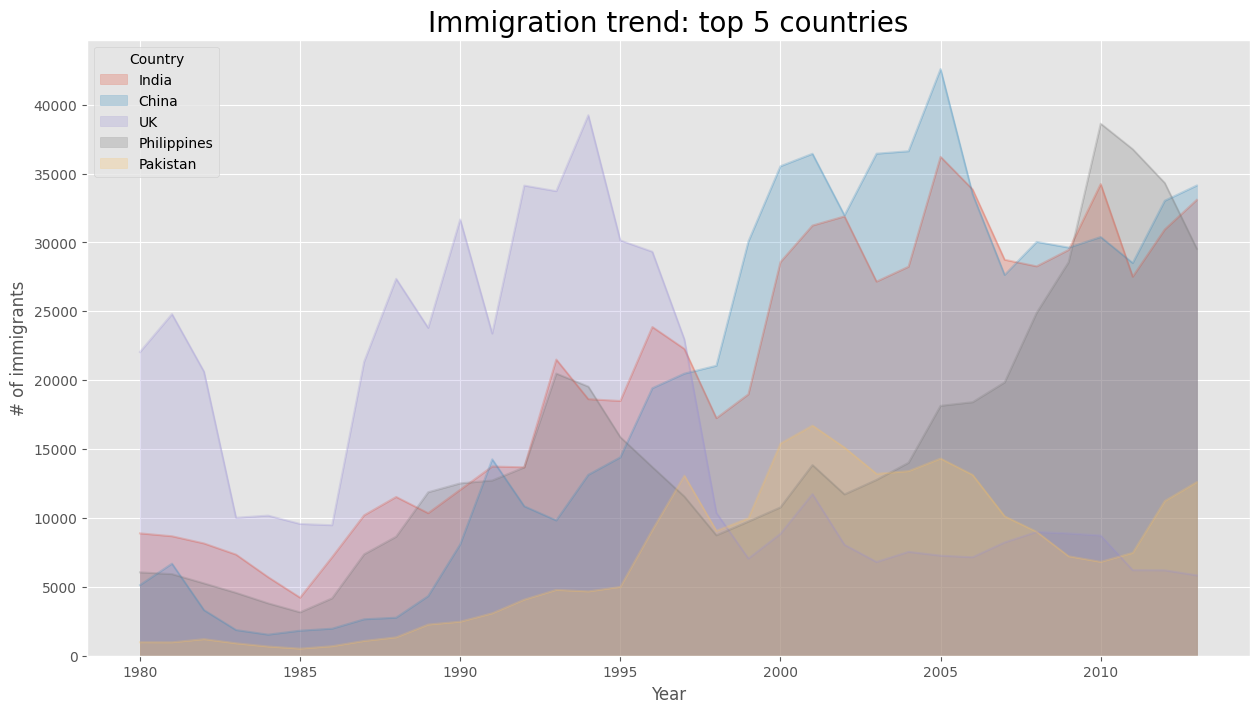

In [223]:
ax = df_top.plot(kind="area", stacked=False,
                 alpha=0.25,
                 figsize=(15, 8))

ax.set_title("Immigration trend: top 5 countries", size=20)
ax.set_xlabel("Year")
ax.set_ylabel("# of immigrants")
plt.show()

### Histograms

You can create histograms with Pandas simply passing "hist" to the `kind` parameter.

**Your turn:** Visualize the frequency distribution of the number of new immigrants from the various countries to Canada in 2013.

Before you get to the plot, examine the data split into intervals using Numpy's `histogram` method to get the bin ranges and frequency counts of the 2013 data:

```python
counts, edges = np.histogram(input_data)
```

Then, create the histogram using Pandas. Set appropriate title and labels.

In [224]:
count, edges = np.histogram(df['2013'])

print(count)
print(edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


We get 10 bins by default. We see that, for example, 178 countries contributed 0 - 3412.9 immigrants in 2013.

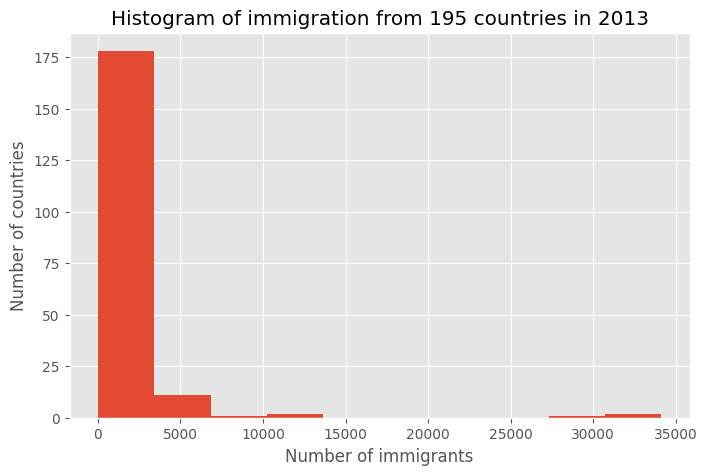

In [225]:
ax = df['2013'].plot(kind='hist', figsize=(8, 5))
ax.set(title="Histogram of immigration from 195 countries in 2013",
      xlabel="Number of immigrants",
      ylabel="Number of countries")
plt.show()

By the way, using `df['2013'].plot(kind='hist')` is equivalent to `df['2013'].plot.hist()`: this holds for other `kind`s of plots.

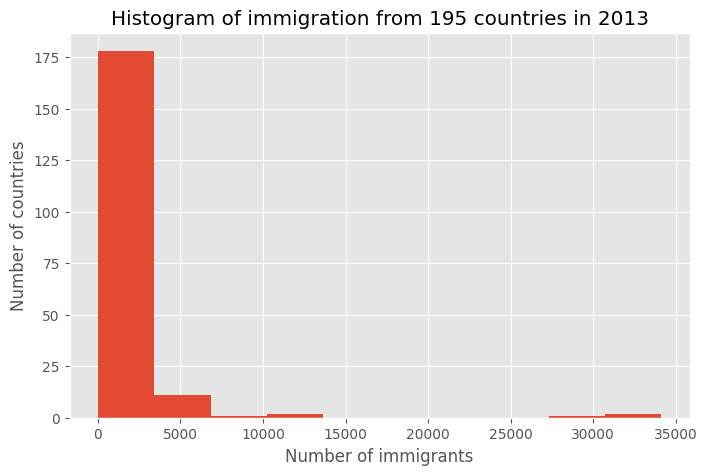

In [226]:
ax = df['2013'].plot.hist(figsize=(8, 5))
ax.set(title="Histogram of immigration from 195 countries in 2013",
      xlabel="Number of immigrants",
      ylabel="Number of countries")
plt.show()

Task: visualize the immigration distribution for Denmark, Norway, and Sweden for the years 1980 - 2013.

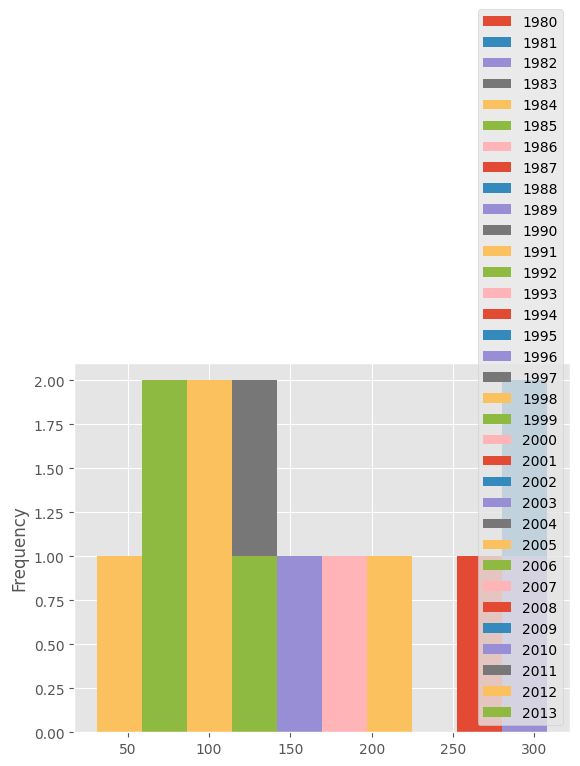

In [227]:
countries = ['Denmark', 'Norway', 'Sweden']

df.loc[countries, years].plot.hist()
plt.show()

Let's fix the issue by transposing the data before plotting. This time, instead of saving the transposed dataframe to a new variable, we do a one-liner:

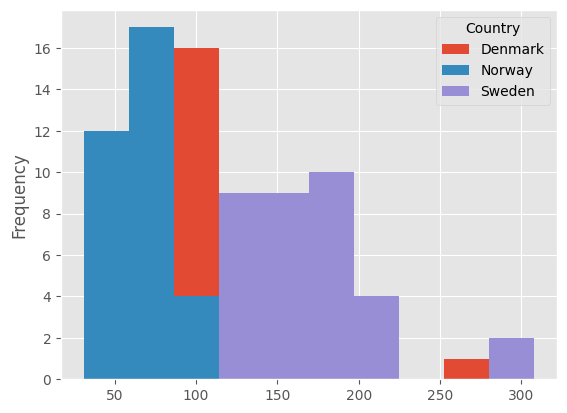

In [228]:
df.loc[countries, years].transpose().plot.hist()
plt.show()

Now we just need to make the plot more readable, by:

- increasing `bins` to 15
- setting the transparency to 70%
- labelling the axes
- customizing the colors
- stretching a bit the figure, setting `figsize=(10, 6)`.

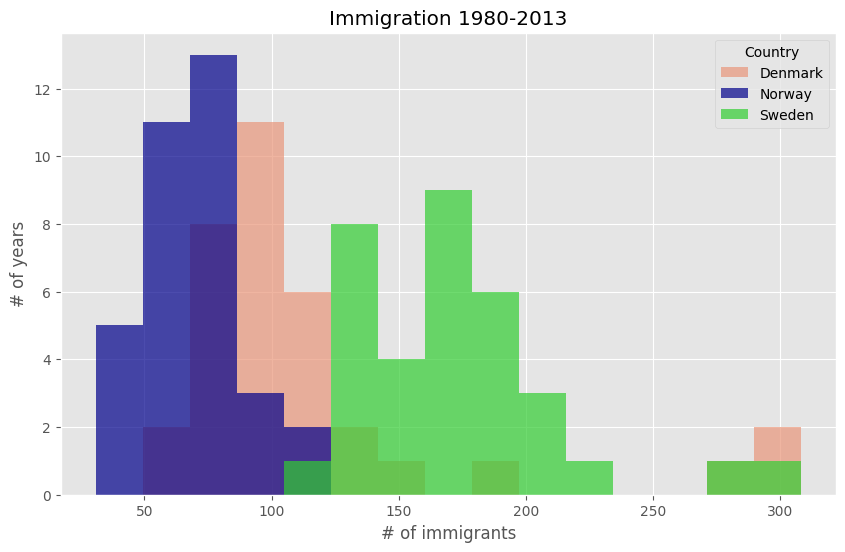

In [229]:
df.loc[countries, years].transpose().plot.hist(figsize=(10, 6),
                                              bins=15,
                                              alpha=0.7,
                                              # stacked=True,
                                              color=['darksalmon', 'darkblue', 'limegreen'])

plt.title("Immigration 1980-2013")
plt.xlabel("# of immigrants")
plt.ylabel("# of years")
plt.show()

### Bar charts

Task: visualize the impact of the 2008-2011 Icelandic financial crisis on the number of Icelandic immigrants to Canada.

With pandas' `plot()` syntax, we'll use `kind='bar'` or `kind='barh'` for vertical and horizontal bar charts, respectively.

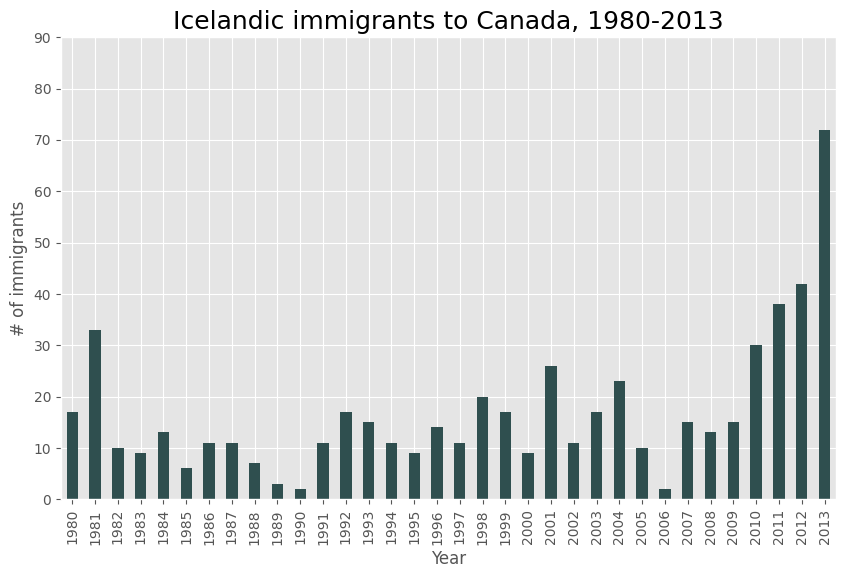

In [230]:
df_i = df.loc['Iceland', years]
df_i.index = df_i.index.map(int)

df_i.plot(kind='bar',
          color='darkslategray',
          figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('# of immigrants')
plt.title('Icelandic immigrants to Canada, 1980-2013', size=18)
plt.ylim(0, 90)

# plt.annotate('',
#             xy=(32, 75),
#             xytext=(28, 75),
#             xycoords='data',
#             arrowprops=dict(arrowstyle='<->', color='firebrick', lw=2))

# plt.text(30, 78, "Financial crisis", horizontalalignment="center")

plt.show()

Task: create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

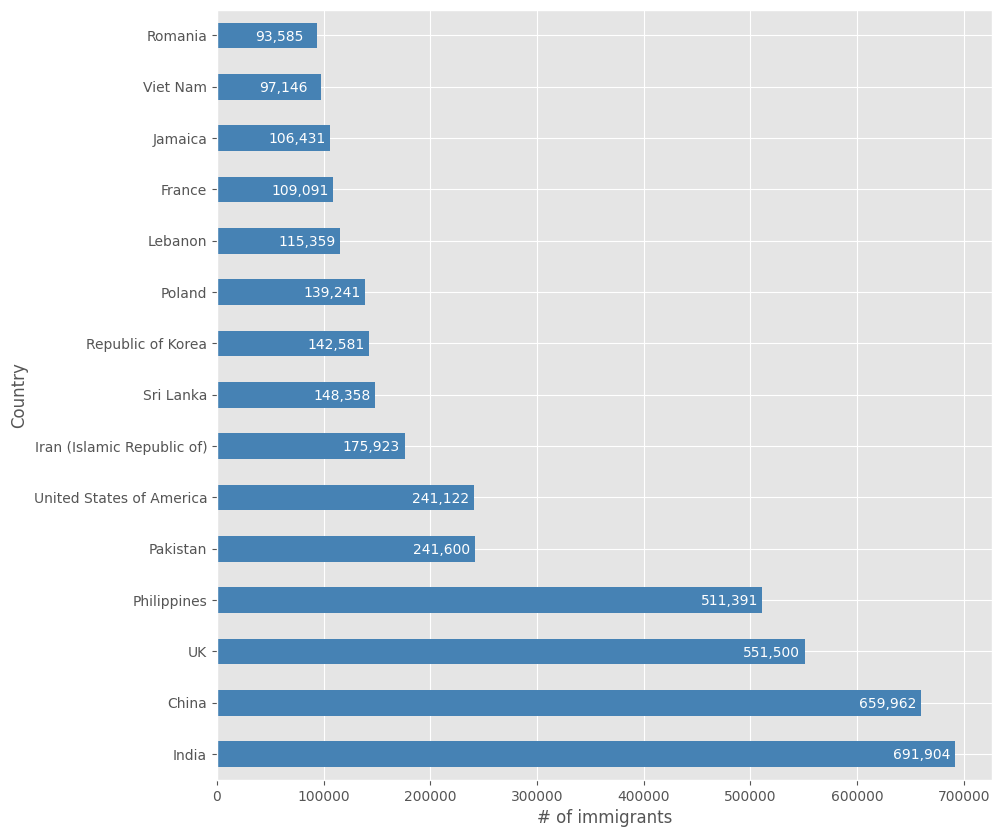

In [231]:
df_top15 = df.sort_values(['Total'], ascending=False)['Total'].head(15)
df_top15.to_frame()

df_top15.plot(kind="barh", color="steelblue",
             figsize=(10, 10))

plt.xlabel('# of immigrants')
plt.ylabel('Country') # not needed actually

for idx, value in enumerate(df_top15):
    label = format(int(value), ',') # format integer numbers with commas as thousand separator
    plt.annotate(label, xy=(value - 58000, idx - 0.10), color="white")
plt.show()

### Pie charts

Task: explore the proportion of new immigrants to Canada grouped by continents for the entire time period from 1980 to 2013.

In [232]:
df_continents = df.groupby('Continent', axis=0).sum()
df_continents.head()

# groupby will drop the axis parameter in the future,
# and behave like "axis=0"
# df_continents = df.groupby('Continent').sum()
# df_continents.head()

/tmp/ipykernel_6746/3607219460.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df.groupby('Continent', axis=0).sum()


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


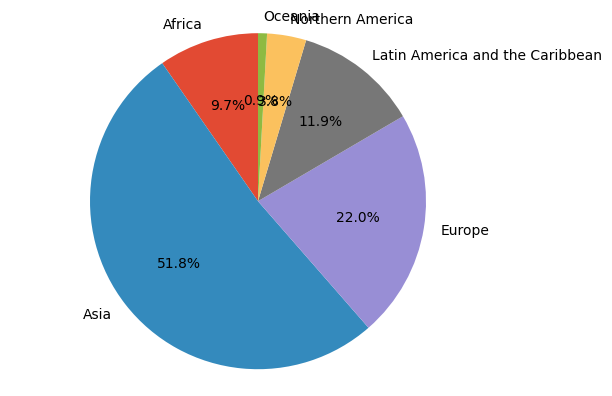

In [233]:
df_continents['Total'].plot(kind='pie',
                            autopct='%1.1f%%', # add and format percentages
                            startangle=90,
                           )

plt.axis('equal') # force equal axes so the pie chart looks like a circle
plt.ylabel('') # turn off y axis label
plt.show()

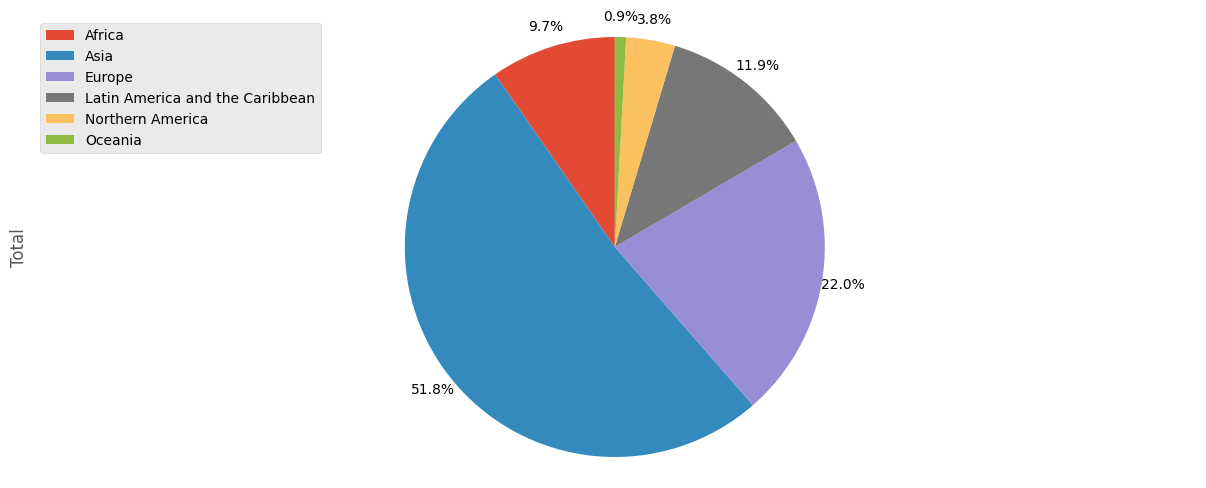

In [234]:
# improved version
df_continents['Total'].plot(kind='pie',
                            autopct='%1.1f%%', # add and format percentages
                            startangle=90,
                            labels=None, # turn off text labels
                            pctdistance=1.1, # move percentages outside
                            figsize=(15, 6)
                           )

plt.axis('equal') # force equal axes so the pie chart looks like a circle
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

### Boxplots

You get boxplots in Pandas passing the "box" argument to the `kind` parameter.

**Your turn:** 

1. Visualize a boxplot of Italian immigrants to Canada from 1980 to 2013.

<Axes: >

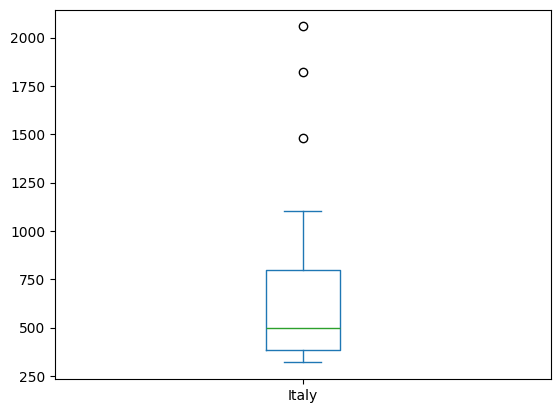

In [240]:
df_italian = df.loc['Italy', years]
df_italian.plot(kind='box')

2. Using boxplots, compare the distribution of immigrants from Italy and Germany for the period 1980 - 2013.

<Axes: >

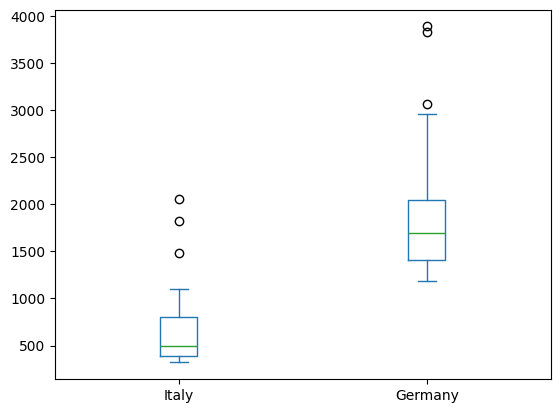

In [245]:
df_ita_ger = df.loc[['Italy', 'Germany'], years]
df_ita_ger = df_ita_ger.transpose()

df_ita_ger.plot(kind='box')

### Scatter plots

Task: visualize the trend of total immigration to Canada (all countries combined) for the years 1980 - 2013.

In [235]:
df_tot = pd.DataFrame(df[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


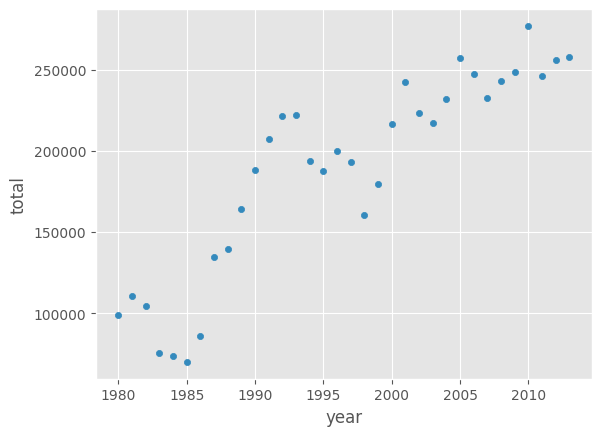

In [236]:
df_tot.plot(kind='scatter', x='year', y='total')

plt.show()

# Seaborn

Seaborn is a visualization library built **on top of Matplotlib**, offering **more modern plot styles** and color defaults, as well as better-looking color palettes. In fact, the look-and-feel of Matplotlib plots is a little old-fashioned in the context of modern data visualization.

Another advantage of Seaborn is its **native handling of Pandas** `DataFrame`s, whereas Matplotlib is not designed for use with them.

Moreover, Seaborn's API is more high-level than Matplotlib's, thus allowing you to create **even complex visualizations with less boilerplate code** than Matplotlib.

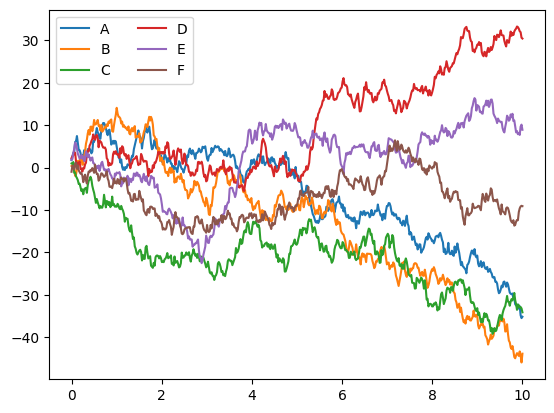

In [237]:
# reset to matplotlib's defaults
mpl.style.use('default')

# data creation
np.random.seed(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

# plot with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc="upper left")
plt.show()

We now load seaborn with its canonical import:

In [246]:
import seaborn as sns

While Seaborn has its own plotting functions, it can also overwrite Matplotlib default parameters: we do this by setting the Seaborn style:

In [247]:
sns.set()

And now we can plot with the same code as above:

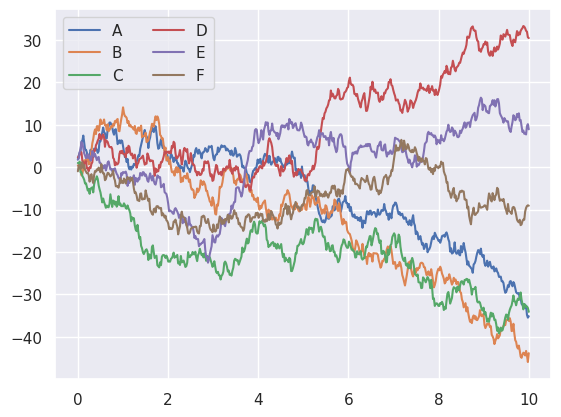

In [248]:
# plot with Seaborn defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc="upper left")
plt.show()

The result is more aesthetically pleasing!

## Seaborn plot gallery

### Histograms and density plots

Seaborn produces histograms with `sns.histplot` and density plots `sns.kdeplot`:

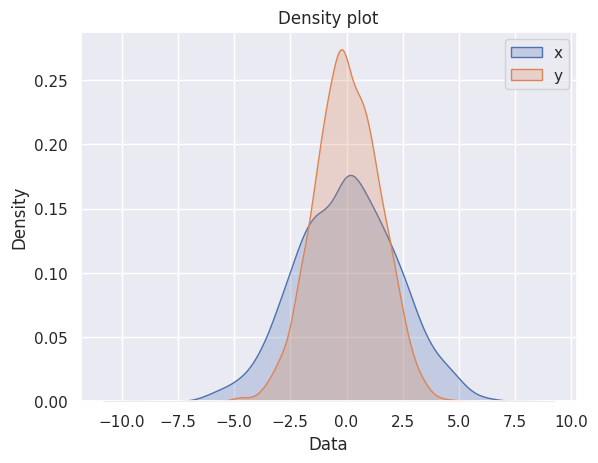

In [249]:
# synthetic data
df = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
df = pd.DataFrame(df, columns=['x', 'y'])

for col in 'xy':
    sns.kdeplot(df[col], fill=True, label=col)

plt.title("Density plot")
plt.xlabel("Data")
plt.legend()
plt.show()

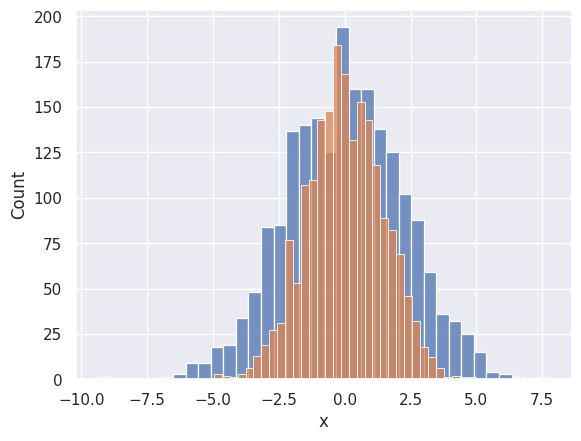

In [250]:
sns.histplot(df['x'])
sns.histplot(df['y'])
plt.show()

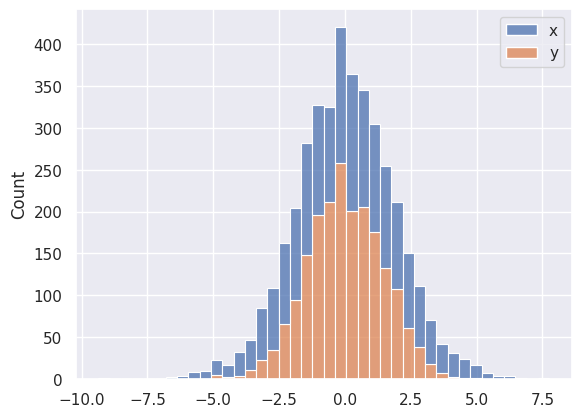

In [251]:
sns.histplot(df, bins=40, multiple="stack");

<Axes: ylabel='Count'>

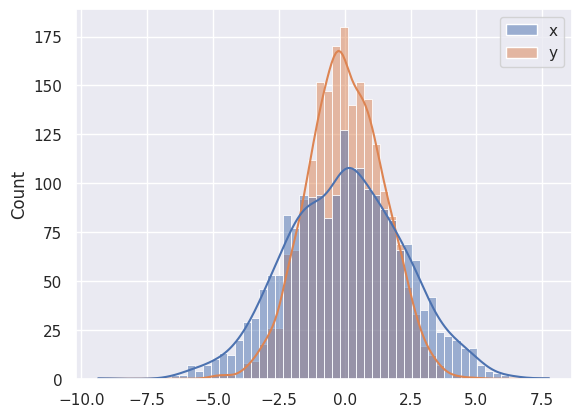

In [252]:
# histogram + KDE
sns.histplot(df, kde=True)

<Axes: xlabel='x', ylabel='y'>

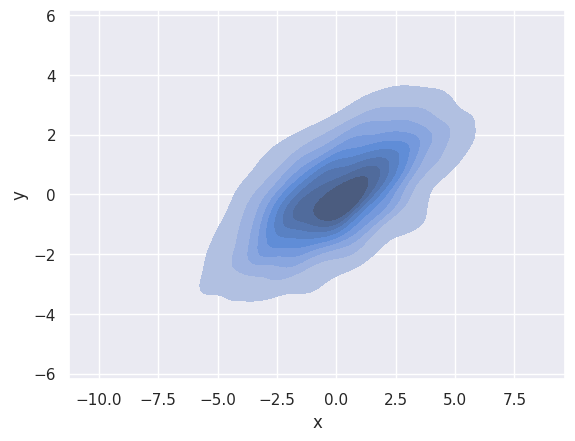

In [253]:
# bivariate KDE plot
sns.kdeplot(df, x="x", y="y", 
            fill=True)

Plots with marginal distributions are obtained with `sns.jointplot`:

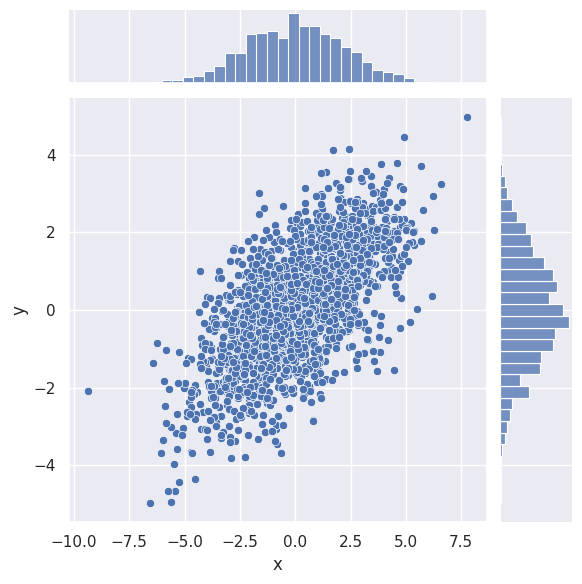

In [254]:
sns.jointplot(x="x", y="y", data=df);

Assigning a `hue` variable will add conditional colors to the plots and an automatic legend:

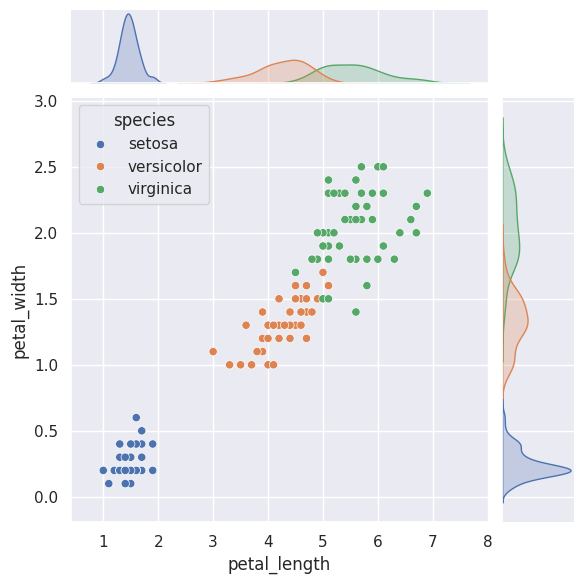

In [255]:
iris = sns.load_dataset("iris")

sns.jointplot(data=iris, x="petal_length", y="petal_width",
              hue="species")

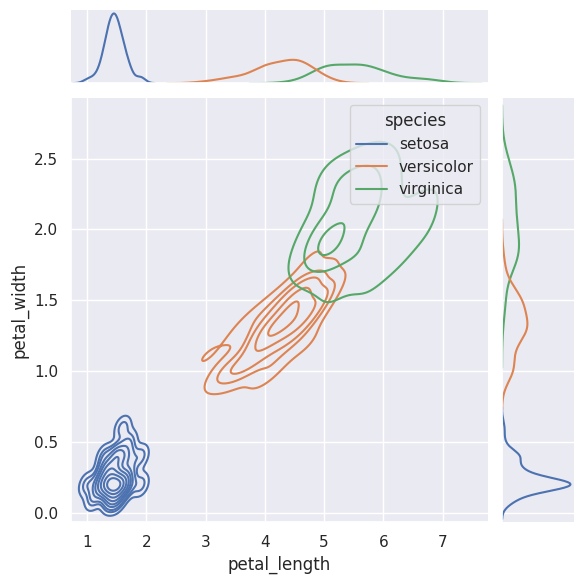

In [256]:
sns.jointplot(data=iris, x="petal_length", y="petal_width",
              hue="species",
              kind="kde")

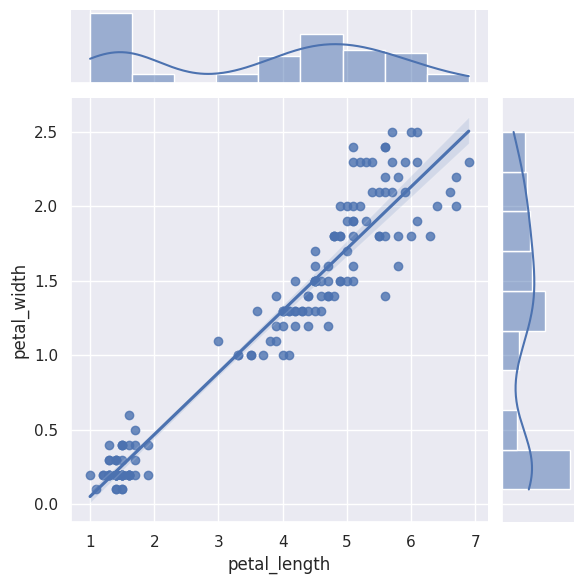

In [257]:
sns.jointplot(data=iris, x="petal_length", y="petal_width",
              kind="reg")

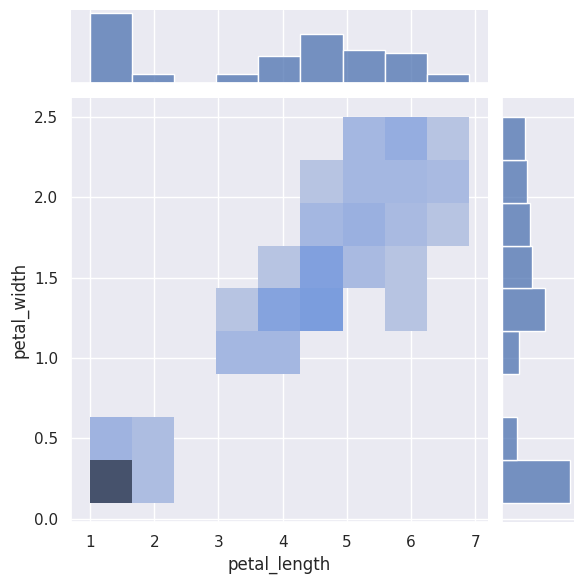

In [258]:
sns.jointplot(data=iris, x="petal_length", y="petal_width",
              kind="hist") # kind="hex"

### Pair plots

Also called "scatterplot matrices", these kinds of plots are useful to explore correlations in multidimensional data.

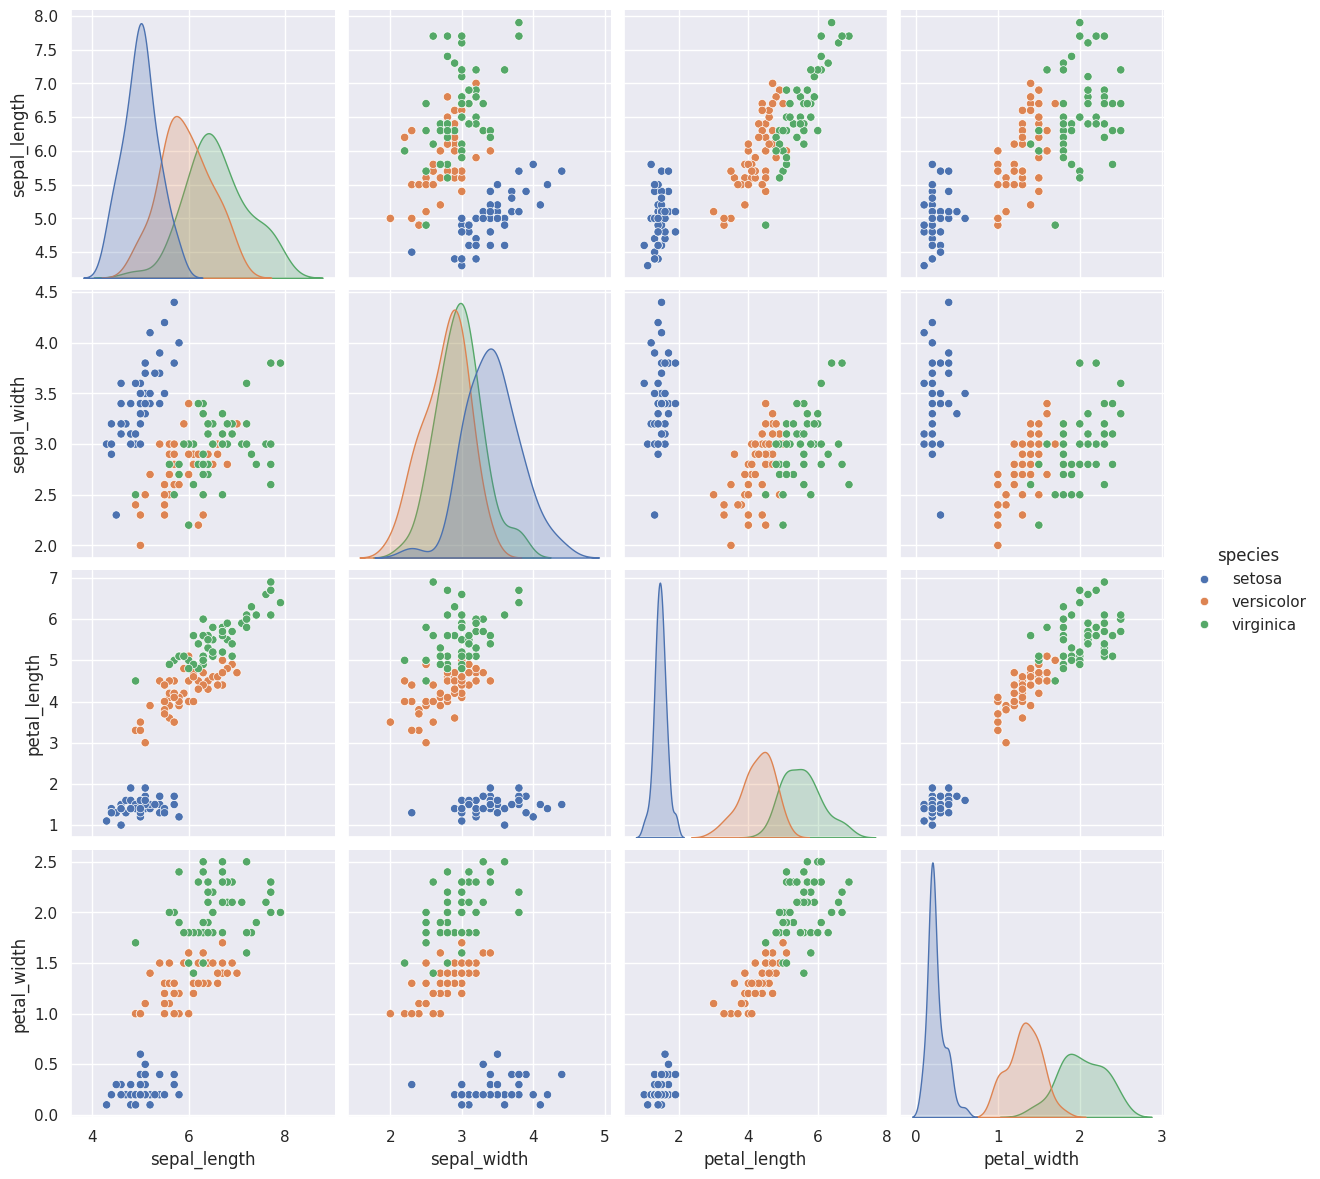

In [259]:
sns.pairplot(iris, hue="species", height=3); # height = h. (inches) of each facet

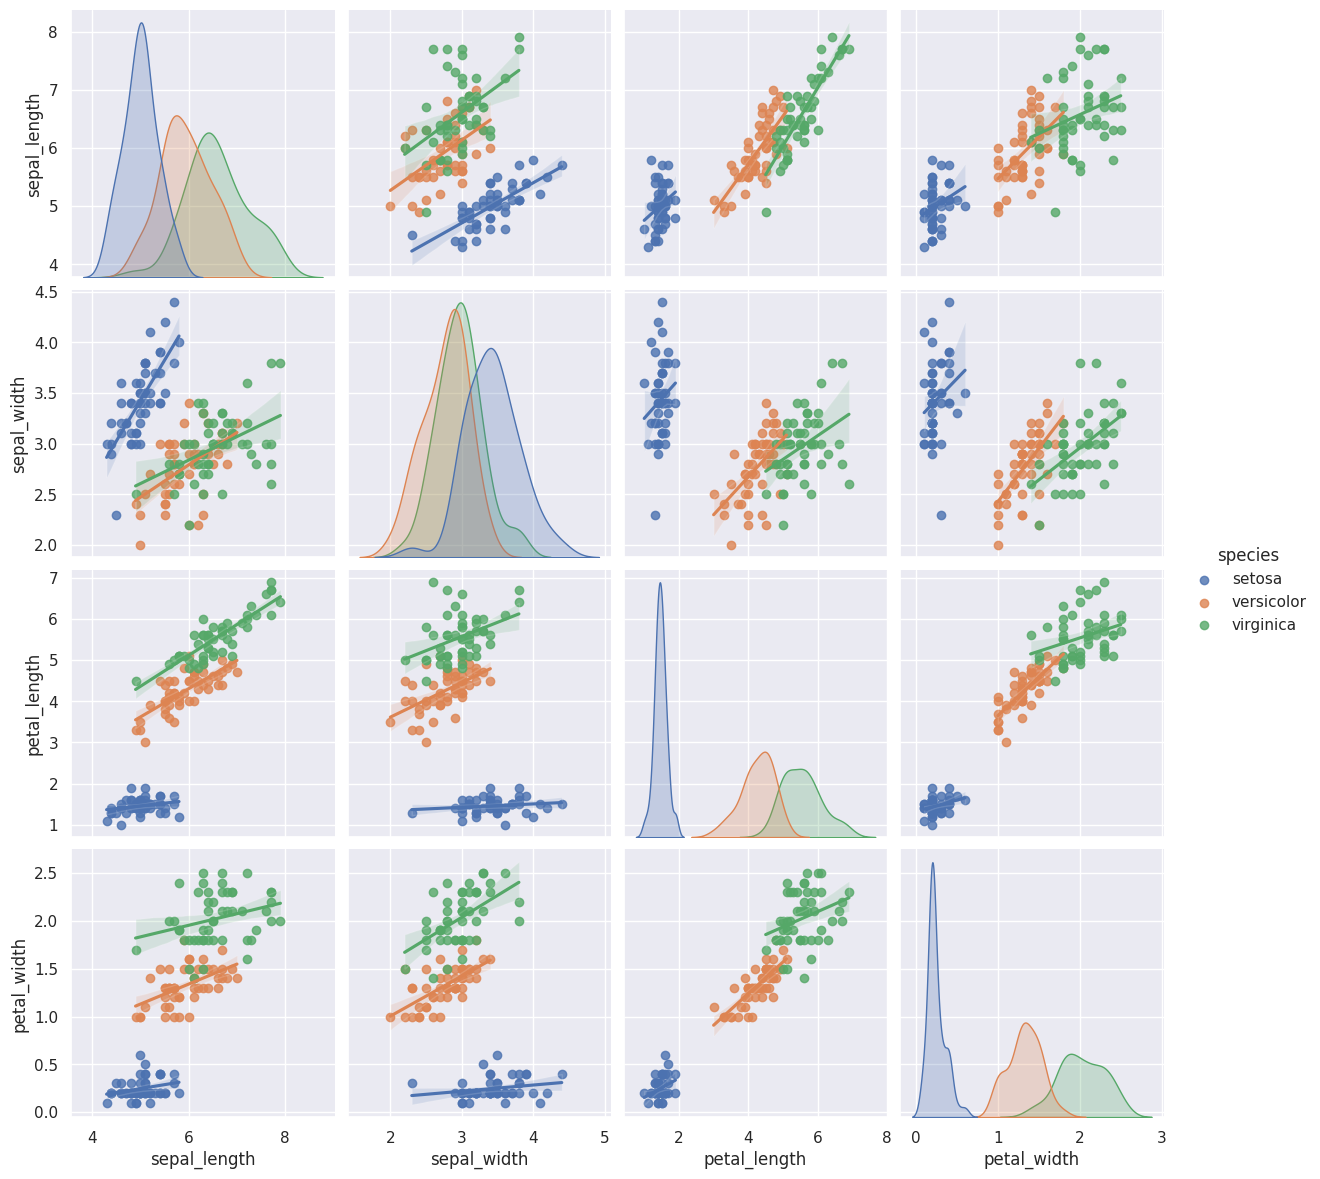

In [260]:
sns.pairplot(iris, hue="species", kind="reg", height=3); # height = h. (inches) of each facet

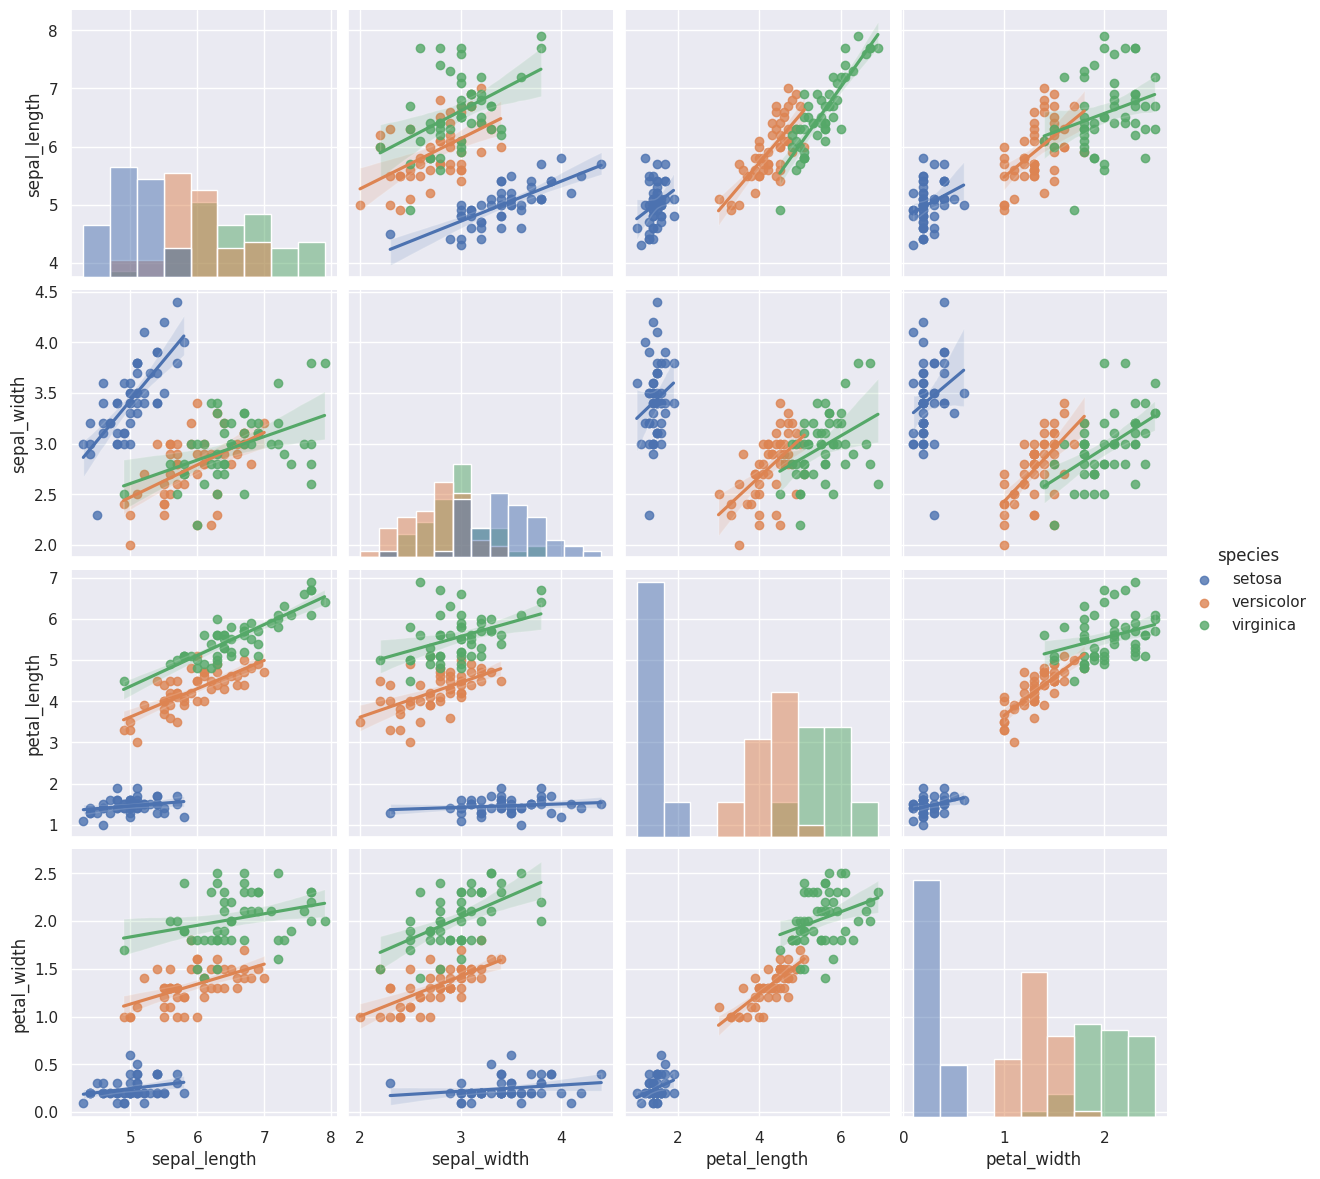

In [261]:
sns.pairplot(iris, hue="species", diag_kind="hist", kind="reg", height=3);